
<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Data visualization avec Seaborn</h1></center>
<center><h2> Analyse statistique multivariée </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


In [2]:
## Exécuter la cellule pour importer les packages/fichiers nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.set_theme() # pour modifier le thème

df= pd.read_csv('nba_sb2.csv', index_col= 0)

### Relation entre plusieurs variables quantitatives (partie 2)


> Pour vérifier une hypothèse de linéarité entre deux variables, une solution rapide est d'afficher un nuage de points et la courbe de régression associée, calculée automatiquement grâce à la fonction **`lmplot`**. <br>
> Elle s'utilise de la même manière que la fonction **`scatterplot`**, et lorsque l'on dissocie les points selon une autre variable, le graphique affiche autant de courbes de régression que de catégories contenues dans la variable.

* Afficher un nuage de points et une droite de régression entre les variables **'mp'** et **'tov'**, colorer les points en fonction de la variable **'po'**. 

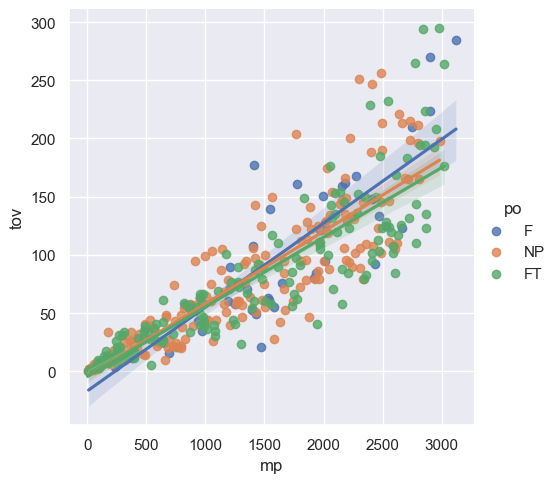

In [3]:
## Insérez votre code ici
sns.lmplot(x='mp',y='tov',hue='po',data=df);

> Par défaut, la courbe affichée est une **droite** de régression. Pour obtenir une courbe plus lisse, obtenue par régression locale (régression [LOWESS](https://fr.wikipedia.org/wiki/Régression_locale)), il suffit d'ajouter l'argument `lowess = True`.<br>

* Afficher une courbe de régression au choix entre les variables **'ast'** et **'tov'**.

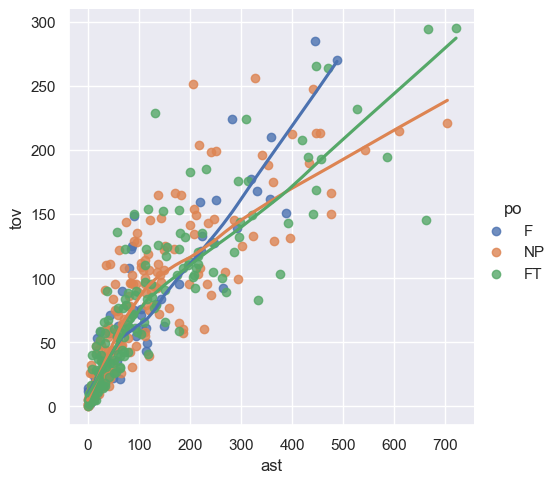

In [11]:
## Insérez votre code ici
sns.lmplot(x='ast',y='tov', hue='po',data=df,lowess=True);


> Pour visualiser dans un même graphique, les nuages de points entre chaque **chaque paire de variables qualitatives**  présente dans un dataset, ainsi que la distribution propre de chaque variable en diagonale, l'appel à la fonction [**`pairplot`**](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de ***Seaborn***, est recommandé.

> Les nuages de points peuvent également être colorés en fonction d'une variable supplémentaire grâce au paramètre `hue`, et les distributions présentes sur la diagonale peuvent être représentées par des histogrammes ou des estimations de la densité, en fonction de l'argument entrée dans `diag_kind` (`hist` ou `kde`).

* Afficher dans un graphique les nuages de points entre chaque paire de variables quantitatives, ainsi que les densités estimées sur la diagonale, parmi 5 variables au choix de **df**.

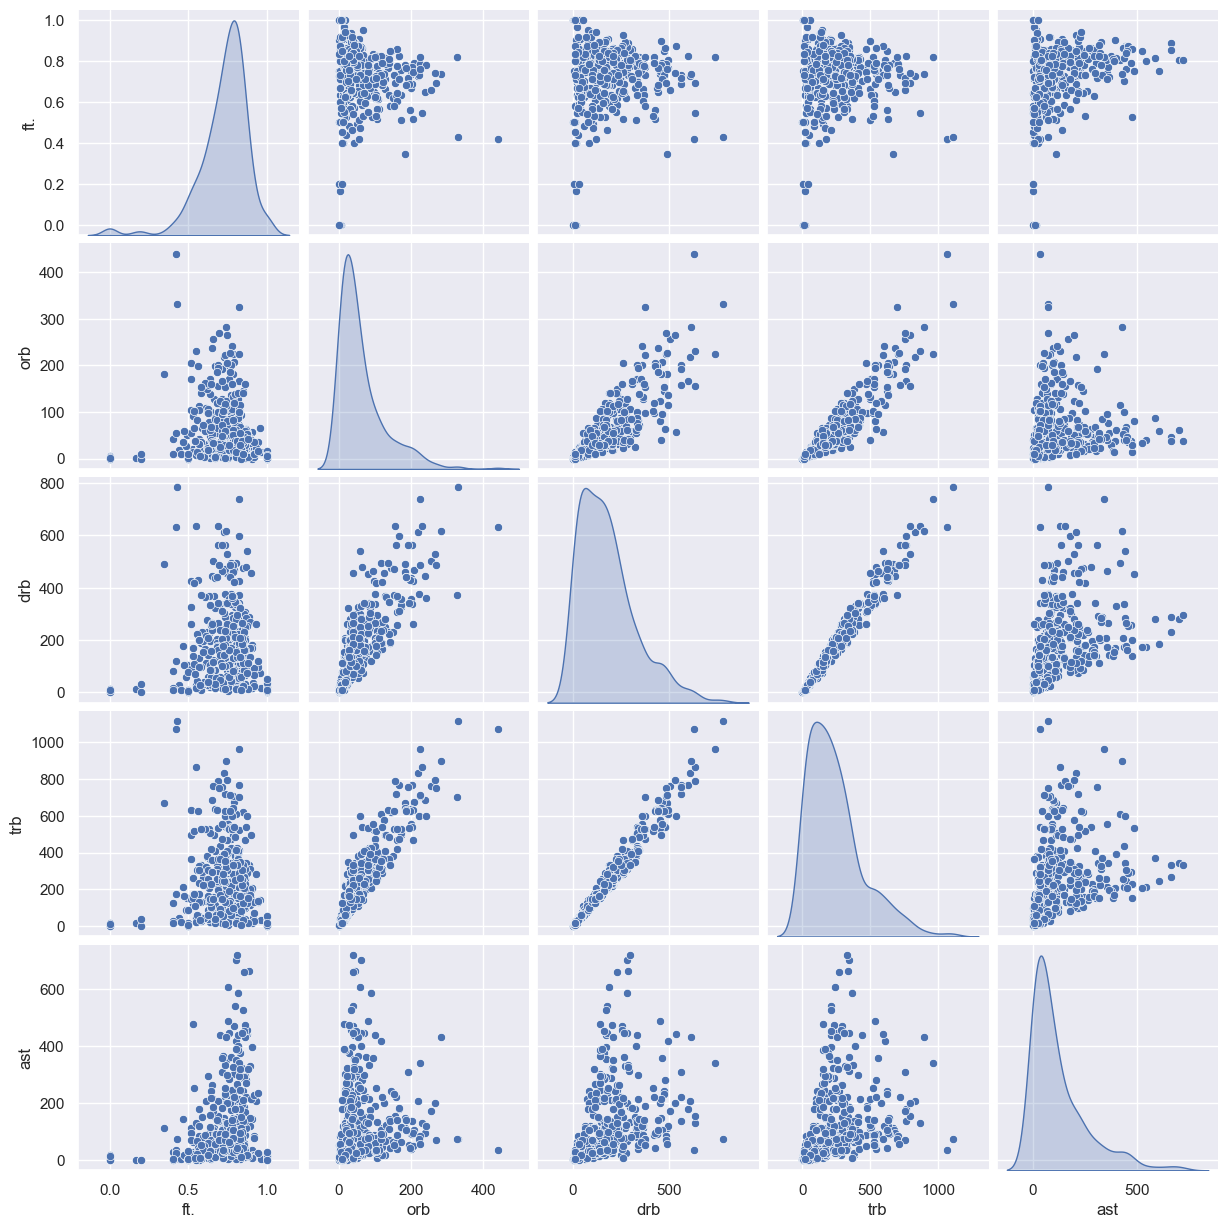

In [4]:
## Insérez votre code ici
sns.pairplot(df.iloc[:,8:13],diag_kind='kde');

> Un bon moyen de mesurer les relations entre chaque paire de variables qualitatives peut-être de visualiser une ***heat map*** de la matrice de corrélation. Une *heat map* permettra de repérer visuellement, à l'aide d'un dégradé de couleurs, les variables les plus corrélés.

> La matrice de corrélation s'obtient facilement à partir d'un *data frame*, grâce à la méthode **`corr`**.<br>
Une fois cette matrice obtenue, il suffit ensuite de la donner en argument à la fonction **`heatmap`** de ***Seaborn***.
Pour ajouter les valeurs sur la *heat map*, on ajoute l'argument **`annot = True`**.

* Afficher la *heat map* des corrélations de toutes les variables qualitatives de **df**.
* Utiliser la colormap `cmap` de votre choix parmi les [palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html) proposées par **seaborn**


<div class='alert alert-warning'>
<i class='fa fa-exclamation-circle'></i> &emsp; 
Comme souligné, au début, <b>Seaborn</b> utilise principalement les objets et fonctions de <i>Matplotlib</i>. Ainsi, si l'on veut modifier manuellement la taille d'une figure, on peut générer des objets <b>Figure</b> et <b>Axes</b> comme sur <i>Matplotlib</i> puis préciser dans l'argument <code style = "background-color: transparent ; color : inherit">ax</code> d'une fonction <b>Seaborn</b> le nom de l'objet <i>Axes</i> sur lequel afficher le graphique.<br>
<span style="color:#09b038; text-decoration : underline"> Exemple : </span><br> 
<code style = "background-color: transparent ; color : inherit">fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x=var, ax= ax)
</code></div>

<Axes: >

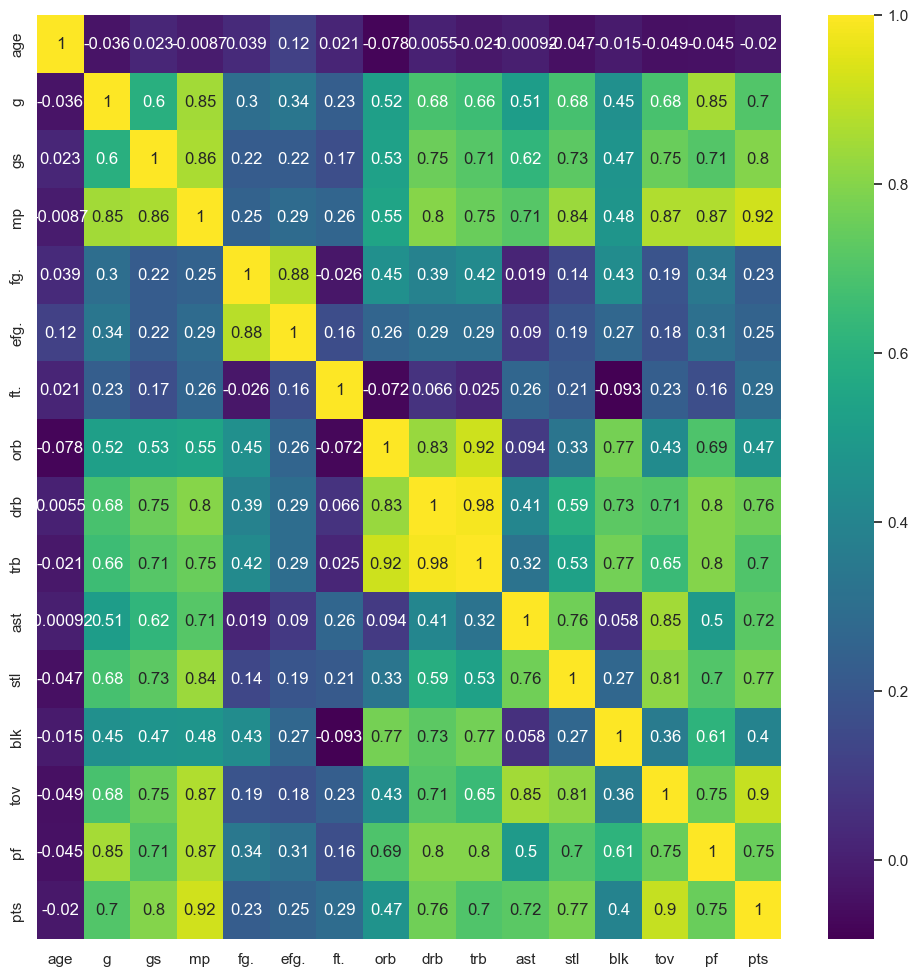

In [5]:
## Insérez votre code ici
# Select columns with numeric types
numeric_df = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(numeric_df.corr(),annot=True,cmap="viridis", ax = ax)